## Loading Libraries and Reading Files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("datasets_746570_1292306_penguins.csv")

## Understandin data

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [4]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [6]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

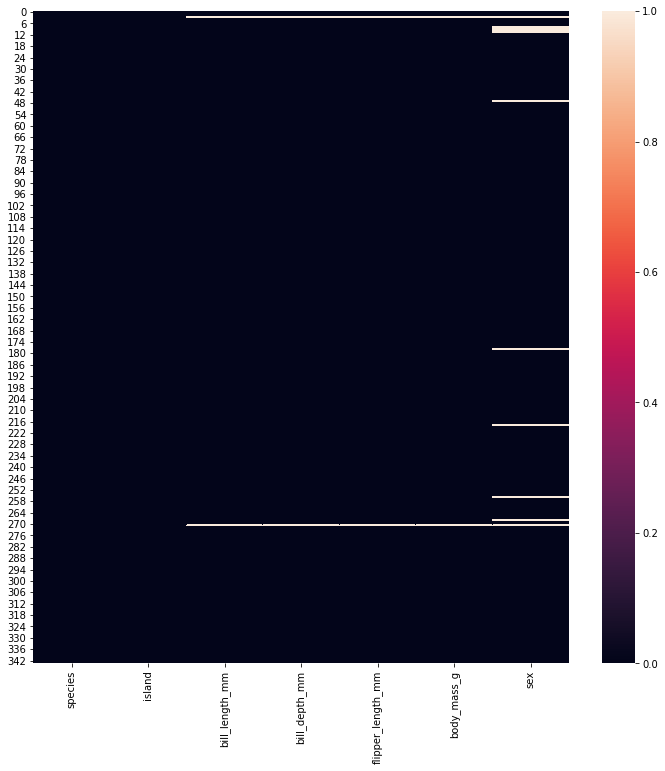

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(df.isnull())

So we will have to remove values of index 3 and 271 from the dataset because they have null in 4/5 features

In [8]:
condition1 = df.bill_depth_mm.isna()

In [9]:
df[condition1].head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [10]:
df.drop(axis=0,index=[3,271],inplace = True)

## Data Visualization:
Main target rightnow is to fill the 9 missing values of the sex columns

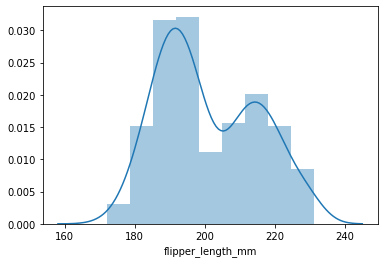

In [11]:
sns.distplot(df.flipper_length_mm)

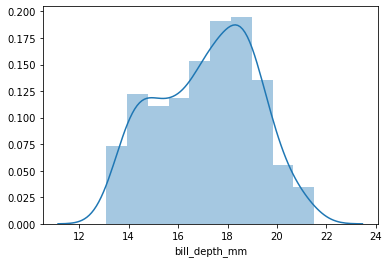

In [12]:
sns.distplot(df.bill_depth_mm)

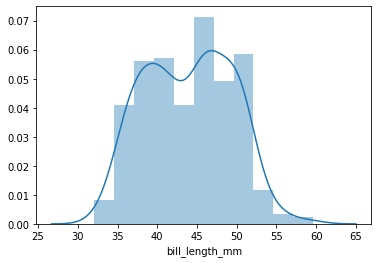

In [13]:
sns.distplot(df.bill_length_mm)

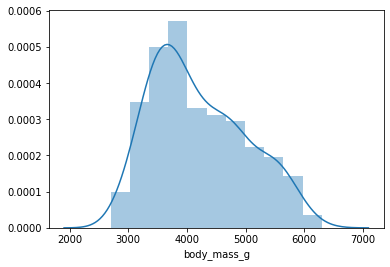

In [14]:
sns.distplot(df.body_mass_g)

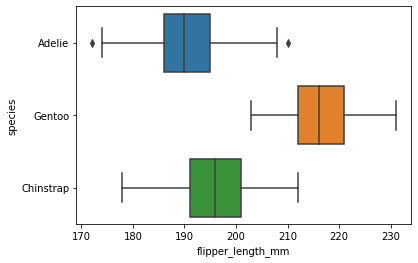

In [15]:
sns.boxplot(x = df.flipper_length_mm, y = df.species)

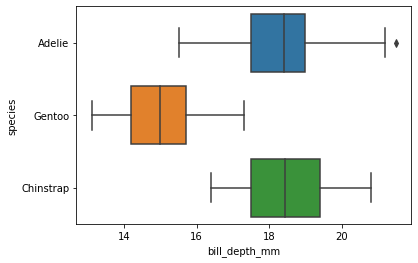

In [16]:
sns.boxplot(x = df.bill_depth_mm, y = df.species)

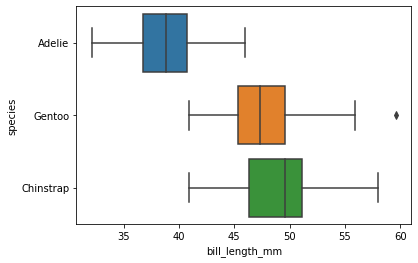

In [17]:
sns.boxplot(x = df.bill_length_mm, y = df.species)

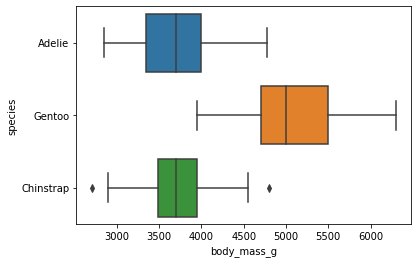

In [18]:
sns.boxplot(x = df.body_mass_g, y = df.species)

In [19]:
df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


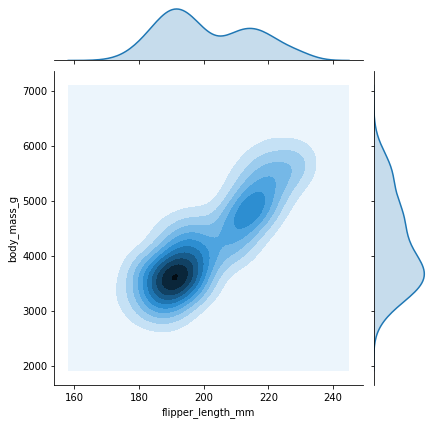

In [20]:
sns.jointplot(x = "flipper_length_mm", y = "body_mass_g",data = df,kind ="kde")

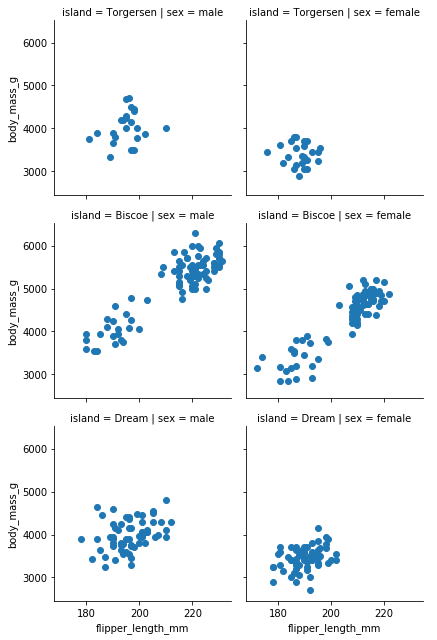

In [21]:
sns.FacetGrid(data = df,row = "island", col = "sex").map(plt.scatter ,"flipper_length_mm","body_mass_g" ).add_legend()


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier    

In [23]:
def result(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    rfc = RandomForestClassifier()
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict(X_test)
    print("Train Data Accuracy {0} ".format(rfc.score(X_train, y_train)))
    print("Test Data Accuracy {0} ".format(rfc.score(X_test, y_test)))

## Data Cleaning AND Model Application:
### As we have missing values in categorical variable 'Sex' so we will try 4 methods to get the best result

#### 1)Removing the null values

In [24]:
data = df.copy(deep=True)

In [25]:
data.dropna(axis = 0,inplace = True)

In [26]:
data.isnull().sum()
data.shape

(333, 7)

In [27]:
Sex = pd.get_dummies(data['sex'], drop_first=True)
Island = pd.get_dummies(data['island'], drop_first=True)

In [28]:
data = pd.concat([data,Sex,Island], axis=1)

In [29]:
data.drop(["sex","island"],axis = 1,inplace = True)

In [30]:
data.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,male,Dream,Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,1,0,1


In [31]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [32]:
result(X,y)

Train Data Accuracy 1.0 
Test Data Accuracy 0.9880952380952381 


### Applying LogisticRegression

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
predections = log_reg.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
print(classification_report(y_test,predections))

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        40
   Chinstrap       0.95      1.00      0.97        19
      Gentoo       1.00      1.00      1.00        41

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [36]:
print(confusion_matrix(y_test,predections))

[[39  1  0]
 [ 0 19  0]
 [ 0  0 41]]


### 2) Using mode to fill nan values in categorical variable 'SEX'

In [37]:
data2 = df.copy(deep=True)

In [38]:
data2.sex.value_counts()

male      168
female    165
Name: sex, dtype: int64

In [39]:
data2.sex.fillna("male",inplace = True)

In [40]:
data2.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [41]:
Sex = pd.get_dummies(data2['sex'], drop_first=True)
Island = pd.get_dummies(data2['island'], drop_first=True)

In [42]:
data2 = pd.concat([data2,Sex,Island], axis=1)
data2.drop(["sex","island"],axis = 1,inplace = True)
data2.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,male,Dream,Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,1,0,1


In [43]:
X = data2.iloc[:,1:]
y = data2.iloc[:,0]

In [44]:
result(X,y)

Train Data Accuracy 1.0 
Test Data Accuracy 0.9767441860465116 


### 3) Building a model to predict the missing values of 'Sex' variable and then using a algorithm to predict the the species

In [45]:
data3 = df.copy(deep=True)


In [46]:
condition1 = data3.sex.isna()

In [47]:
X_test = data3[condition1].head(10)
X_test.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN


In [48]:
X_test.drop(axis = 1,labels="sex",inplace = True)
X_test

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0
47,Adelie,Dream,37.5,18.9,179.0,2975.0
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0


In [49]:
X_test["Chinstrap"] = [0]*9

In [50]:
Species = pd.get_dummies(X_test['species'], drop_first=True)
Island = pd.get_dummies(X_test['island'], drop_first=True)

In [51]:
X_test = pd.concat([X_test,Species,Island], axis=1)
X_test.drop(["species","island"],axis = 1,inplace = True)

In [52]:
X_test

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Chinstrap,Gentoo,Dream,Torgersen
8,34.1,18.1,193.0,3475.0,0,0,0,1
9,42.0,20.2,190.0,4250.0,0,0,0,1
10,37.8,17.1,186.0,3300.0,0,0,0,1
11,37.8,17.3,180.0,3700.0,0,0,0,1
47,37.5,18.9,179.0,2975.0,0,0,1,0
178,44.5,14.3,216.0,4100.0,0,1,0,0
218,46.2,14.4,214.0,4650.0,0,1,0,0
256,47.3,13.8,216.0,4725.0,0,1,0,0
268,44.5,15.7,217.0,4875.0,0,1,0,0


In [53]:
X = data3.drop(axis=0,index=[8,9,10,11,47,178,218,256,268])

In [54]:
X.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [55]:
Species = pd.get_dummies(X['species'], drop_first=True)
Island = pd.get_dummies(X['island'], drop_first=True)

In [56]:
X = pd.concat([X,Species,Island], axis=1)
X.drop(["species","island"],axis = 1,inplace = True)

In [57]:
X_train = X.iloc[:,[0,1,2,3,5,6,7,8]]
y_train = X.iloc[:,4]

In [58]:
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Chinstrap,Gentoo,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,0,0,0,1
1,39.5,17.4,186.0,3800.0,0,0,0,1
2,40.3,18.0,195.0,3250.0,0,0,0,1
4,36.7,19.3,193.0,3450.0,0,0,0,1
5,39.3,20.6,190.0,3650.0,0,0,0,1


In [59]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [60]:
data3.sex.fillna(value = {8:"female",9:"male",10:"female",11:"female",47:"female",178:"female",218:"female",256:"female",268:"female"},inplace = True)

In [61]:
data3.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [62]:
data3.shape

(342, 7)

In [63]:
Sex = pd.get_dummies(data3['sex'], drop_first=True)
Island = pd.get_dummies(data3['island'], drop_first=True)

In [64]:
data3 = pd.concat([data3,Sex,Island], axis=1)
data3.drop(["sex","island"],axis = 1,inplace = True)
data3.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,male,Dream,Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,1,0,1


In [65]:
X = data3.iloc[:,1:]
y = data3.iloc[:,0]

In [66]:
result(X,y)

Train Data Accuracy 1.0 
Test Data Accuracy 0.9767441860465116 


# RESULT:
## We get 99% accuracy when we deleted the null values from "Sex" Variable